In [1]:
%matplotlib inline
from pycocotools.coco import COCO
from pycocoevalcap.eval import COCOEvalCap
import matplotlib.pyplot as plt
import skimage.io as io
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

import json
from json import encoder
encoder.FLOAT_REPR = lambda o: format(o, '.3f')

In [2]:
# set up file names and pathes
dataDir = 'coco'
dataType = 'val2014'
algName = 'beam_search_k5'
annFile = '%s/annotations/captions_%s.json'%(dataDir,dataType)
# annFile = 'captions_coco_val2014_results.json'
subtypes = ['results', 'evalImgs', 'eval']
# [resFile, evalImgsFile, evalFile]= ['%s/results/captions_%s_%s_%s.json'%(dataDir,dataType,algName,subtype) for subtype in subtypes]
resFile = '{}/results/captions_coco_val2014_results.json'.format(dataDir)
# download Stanford models
# !./get_stanford_models.sh

In [3]:
# create coco object and cocoRes object
coco = COCO(annFile)
cocoRes = coco.loadRes(resFile)

loading annotations into memory...
Done (t=0.33s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!


In [4]:
# create cocoEval object by taking coco and cocoRes
cocoEval = COCOEvalCap(coco, cocoRes)

# evaluate on a subset of images by setting
# cocoEval.params['image_id'] = cocoRes.getImgIds()
# please remove this line when evaluating the full validation set
cocoEval.params['image_id'] = cocoRes.getImgIds()

# evaluate results
# SPICE will take a few minutes the first time, but speeds up due to caching
cocoEval.evaluate()

tokenization...
setting up scorers...
computing Bleu score...
{'testlen': 55234, 'reflen': 52811, 'guess': [55234, 50171, 45108, 40045], 'correct': [32570, 14575, 6607, 3030]}
ratio: 1.0458805930582447
Bleu_1: 0.590
Bleu_2: 0.414
Bleu_3: 0.293
Bleu_4: 0.209
computing METEOR score...
METEOR: 0.218
computing Rouge score...
ROUGE_L: 0.463
computing CIDEr score...
CIDEr: 0.695
computing SPICE score...
SPICE: 0.148


In [8]:
# print output evaluation scores
for metric, score in cocoEval.eval.items():
    print('%s: %.3f'%(metric, score))

Bleu_1: 0.590
Bleu_2: 0.414
Bleu_3: 0.293
Bleu_4: 0.209
METEOR: 0.218
ROUGE_L: 0.463
CIDEr: 0.695
SPICE: 0.148


In [10]:
# demo how to use evalImgs to retrieve low score result
evals = [eva for eva in cocoEval.evalImgs if eva['CIDEr']<30]
print('ground truth captions')
imgId = evals[0]['image_id']
annIds = coco.getAnnIds(imgIds=imgId)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

print('\n')
print('generated caption (CIDEr score %0.1f)'%(evals[0]['CIDEr']))
annIds = cocoRes.getAnnIds(imgIds=imgId)
anns = cocoRes.loadAnns(annIds)
coco.showAnns(anns)

img = coco.loadImgs(imgId)[0]
I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
plt.imshow(I)
plt.axis('off')
plt.show()

ground truth captions
A man with a red helmet on a small moped on a dirt road. 
Man riding a motor bike on a dirt road on the countryside.
A man riding on the back of a motorcycle.
A dirt path with a young person on a motor bike rests to the foreground of a verdant area with a bridge and a background of cloud-wreathed mountains. 
A man in a red shirt and a red hat is on a motorcycle on a hill side.


generated caption (CIDEr score 0.0)
a group of people standing on top of a lush green field


FileNotFoundError: No such file: '/mnt/d/Projects/mscoco/coco/images/val2014/COCO_val2014_000000391895.jpg'

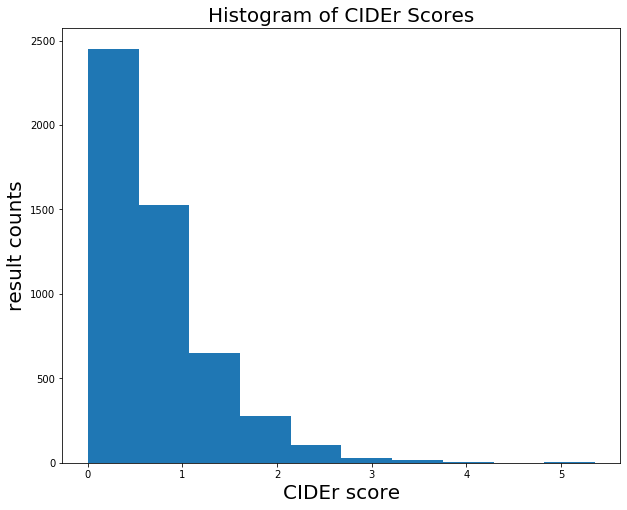

In [11]:
# plot score histogram
ciderScores = [eva['CIDEr'] for eva in cocoEval.evalImgs]
plt.hist(ciderScores)
plt.title('Histogram of CIDEr Scores', fontsize=20)
plt.xlabel('CIDEr score', fontsize=20)
plt.ylabel('result counts', fontsize=20)
plt.show()

In [12]:
# save evaluation results to ./results folder
json.dump(cocoEval.evalImgs, open(evalImgsFile, 'w'))
json.dump(cocoEval.eval,     open(evalFile, 'w'))

NameError: name 'evalImgsFile' is not defined